In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Flatten


In [12]:
# define look-back period and number of features
look_back = 12
n_features = 5


In [13]:
# load dataset
dataset = np.genfromtxt('my all.csv', delimiter=',', skip_header=1, filling_values=np.nan)
dataset

array([[1.00000e+00, 5.75740e+03, 1.35130e+04, 4.26270e+03, 4.26270e+03,
        2.30103e+03],
       [1.00000e+00, 5.87710e+03, 1.44875e+04, 4.59270e+03, 4.59270e+03,
        2.30012e+03],
       [1.00000e+00, 5.92640e+03, 1.53685e+04, 4.67950e+03, 4.67950e+03,
        2.29810e+03],
       ...,
       [2.40000e+01, 6.06630e+03, 1.87872e+04, 4.82610e+03, 4.82610e+03,
        1.99958e+03],
       [2.40000e+01, 6.06630e+03, 1.87872e+04, 4.82610e+03, 4.82610e+03,
        1.99958e+03],
       [2.40000e+01, 6.06630e+03, 1.87872e+04, 4.82610e+03, 4.82610e+03,
        1.99958e+03]])

In [14]:
# print the shape and contents of dataset
print('dataset shape:', dataset.shape)
print('dataset contents:', dataset)

dataset shape: (35060, 6)
dataset contents: [[1.00000e+00 5.75740e+03 1.35130e+04 4.26270e+03 4.26270e+03 2.30103e+03]
 [1.00000e+00 5.87710e+03 1.44875e+04 4.59270e+03 4.59270e+03 2.30012e+03]
 [1.00000e+00 5.92640e+03 1.53685e+04 4.67950e+03 4.67950e+03 2.29810e+03]
 ...
 [2.40000e+01 6.06630e+03 1.87872e+04 4.82610e+03 4.82610e+03 1.99958e+03]
 [2.40000e+01 6.06630e+03 1.87872e+04 4.82610e+03 4.82610e+03 1.99958e+03]
 [2.40000e+01 6.06630e+03 1.87872e+04 4.82610e+03 4.82610e+03 1.99958e+03]]


In [15]:
# remove rows with NaN values
dataset = dataset[~np.isnan(dataset).any(axis=1)]
dataset

array([[1.00000e+00, 5.75740e+03, 1.35130e+04, 4.26270e+03, 4.26270e+03,
        2.30103e+03],
       [1.00000e+00, 5.87710e+03, 1.44875e+04, 4.59270e+03, 4.59270e+03,
        2.30012e+03],
       [1.00000e+00, 5.92640e+03, 1.53685e+04, 4.67950e+03, 4.67950e+03,
        2.29810e+03],
       ...,
       [2.40000e+01, 6.06630e+03, 1.87872e+04, 4.82610e+03, 4.82610e+03,
        1.99958e+03],
       [2.40000e+01, 6.06630e+03, 1.87872e+04, 4.82610e+03, 4.82610e+03,
        1.99958e+03],
       [2.40000e+01, 6.06630e+03, 1.87872e+04, 4.82610e+03, 4.82610e+03,
        1.99958e+03]])

In [16]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
test
train

array([[1.00000e+00, 5.75740e+03, 1.35130e+04, 4.26270e+03, 4.26270e+03,
        2.30103e+03],
       [1.00000e+00, 5.87710e+03, 1.44875e+04, 4.59270e+03, 4.59270e+03,
        2.30012e+03],
       [1.00000e+00, 5.92640e+03, 1.53685e+04, 4.67950e+03, 4.67950e+03,
        2.29810e+03],
       ...,
       [1.30000e+01, 1.11573e+04, 1.56790e+04, 1.02010e+04, 1.02010e+04,
        2.78891e+03],
       [1.30000e+01, 1.10322e+04, 1.54974e+04, 1.00767e+04, 1.00767e+04,
        2.78828e+03],
       [1.30000e+01, 1.08574e+04, 1.55200e+04, 9.90210e+03, 9.90210e+03,
        2.78687e+03]])

In [17]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)

In [18]:
# prepare the training data
trainX, trainY = [], []
for i in range(look_back, len(train)):
    trainX.append(train[i-look_back:i, :n_features])
    trainY.append(train[i, n_features])
trainX, trainY = np.array(trainX), np.array(trainY)


In [19]:
# prepare the testing data
testX, testY = [], []
for i in range(look_back, len(test)):
    testX.append(test[i-look_back:i, :n_features])
    testY.append(test[i, n_features])
testX, testY = np.array(testX), np.array(testY)

In [20]:
# build the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)


Epoch 1/10
734/734 - 14s - loss: 0.0028 - val_loss: 0.0163 - 14s/epoch - 18ms/step
Epoch 2/10
734/734 - 11s - loss: 0.0021 - val_loss: 0.0127 - 11s/epoch - 14ms/step
Epoch 3/10
734/734 - 12s - loss: 0.0019 - val_loss: 0.0114 - 12s/epoch - 16ms/step
Epoch 4/10
734/734 - 11s - loss: 0.0018 - val_loss: 0.0153 - 11s/epoch - 15ms/step
Epoch 5/10
734/734 - 11s - loss: 0.0017 - val_loss: 0.0106 - 11s/epoch - 15ms/step
Epoch 6/10
734/734 - 12s - loss: 0.0016 - val_loss: 0.0138 - 12s/epoch - 16ms/step
Epoch 7/10
734/734 - 11s - loss: 0.0016 - val_loss: 0.0126 - 11s/epoch - 15ms/step
Epoch 8/10
734/734 - 11s - loss: 0.0015 - val_loss: 0.0153 - 11s/epoch - 15ms/step
Epoch 9/10
734/734 - 10s - loss: 0.0015 - val_loss: 0.0126 - 10s/epoch - 14ms/step
Epoch 10/10
734/734 - 11s - loss: 0.0015 - val_loss: 0.0149 - 11s/epoch - 15ms/step


In [22]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


362/362 [==============================] - 2s 5ms/step


In [23]:
# calculate the root mean squared error
trainScore = np.sqrt(np.mean(np.square(trainY[0] - trainPredict[:,0])))
print('Train RMSE: %.2f' % (trainScore))
testScore = np.sqrt(np.mean(np.square(testY[0] - testPredict[:,0])))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 0.11
Test RMSE: 0.13


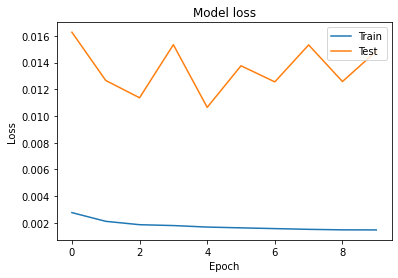

In [24]:
import matplotlib.pyplot as plt

# plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

362/362 [==============================] - 2s 6ms/step


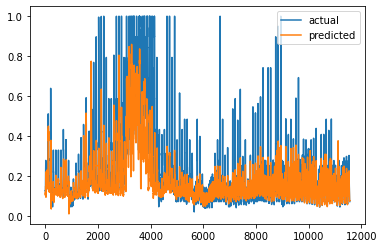

In [25]:
testPredict = model.predict(testX)
plt.plot(testY, label='actual')
plt.plot(testPredict, label='predicted')
plt.legend()
plt.show()

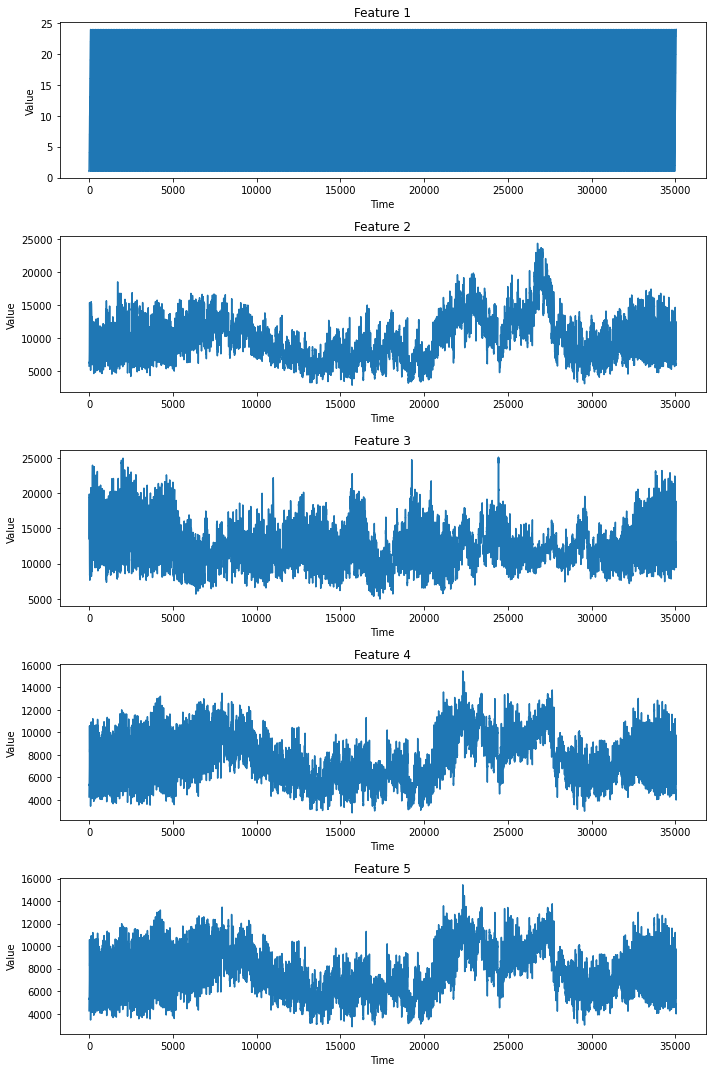

In [26]:
fig, axs = plt.subplots(n_features, 1, figsize=(10, 15))
for i in range(n_features):
    axs[i].plot(dataset[:, i])
    axs[i].set_title('Feature {}'.format(i+1))
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Value')
plt.tight_layout()
plt.show()